In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import ensemble
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

In [3]:
path = "data/kc_house_data.csv"
df = pd.read_csv(path, parse_dates=["date"])

In [4]:
X, y = df.drop(['price', 'date'], axis=1), df.price

In [19]:
# Splitting our data in subsets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [45]:
# fit estimator
est = ensemble.GradientBoostingRegressor(n_estimators=200, max_depth=6, loss='ls')
est.fit(X_train, y_train)

# predict class labels
pred = est.predict(X_test)

# score on test data (accuracy)
acc = est.score(X_test, y_test)
print('ACC: %.4f' % acc)

ACC: 0.9009


In [14]:
import numpy.random as rand
N = 19
N_ESTIMATORS = 500

f = lambda x: np.sin(X)

xs = rand.uniform(-np.pi, np.pi, N)
ys = f(xs) + rand.normal(0, 0.20, N)

In [32]:
# using 'RobustScaler' makes our data scaled in a robust way... depends on your target values
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
robust_scaled_Train = scaler.fit_transform(X_train)
robust_scaled_Test = scaler.fit_transform(X_test)

In [37]:
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'quantile'}
clf = ensemble.GradientBoostingRegressor(**params)

In [38]:
clf.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='quantile', max_depth=4,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=500,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [39]:
pred = clf.predict(X_test)

In [40]:
clf.train_score_[0]

80521.503202429143

In [41]:
clf.loss_(y_test, pred)

19747.02982800568

In [42]:
mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)

MSE: 34069905631.3064


In [43]:
predictions = list(clf.staged_predict(X_test))
print(predictions[0])
print(predictions[1])
predictions[0][:] = 0
print(predictions[1])

[ 884578.  907778.  884578. ...,  884578.  884578.  884578.]
[ 881982.22  928680.22  881982.22 ...,  881982.22  881982.22  881982.22]
[ 881982.22  928680.22  881982.22 ...,  881982.22  881982.22  881982.22]


In [24]:
# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

In [25]:
for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

Text(0,0.5,'Deviance')

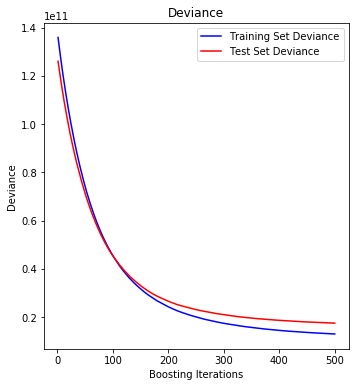

In [28]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

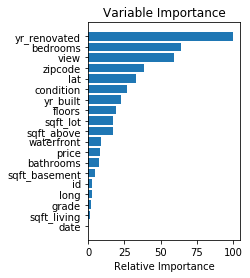

In [31]:
# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, df.columnsns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [46]:
from sklearn.linear_model import Lasso

In [51]:
lasso = Lasso().fit(X_train, y_train)
print("Training score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {:.2f}".format(np.sum(lasso.coef_ != 0)))

Training score: 0.70
Test score: 0.70
Number of features used: 19.00


C:\Users\Saleban\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [56]:
from sklearn.linear_model import ARDRegression

In [58]:
ridge = ARDRegression().fit(X_train, y_train)
print("Training score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test score: {:.2f}".format(ridge.score(X_test, y_test)))

KeyboardInterrupt: 